# Análisis Exploratorio de Datos con Enfoque en El Diario de Juarez

## 1. Introducción

1. El Diario de Juárez es un diario mexicano publicado en Ciudad Juárez, fundado por Osvaldo Rodríguez Borunda en 1976. Actualmente es el diario decano de Ciudad Juárez y el de mayor circulación en la ciudad y uno de los más importante del estado de Chihuahua.
Se eligio la pagina de el diario de juarez ya que contiene informacion que cambia cada dia y cubre notas principalmente de a ciudad. se estuvo obteniendo la informacion a lo largo de varios dias y se guardo en un archivo csv
2. Este análisis se enfocó en el listado de las notas periodisticas publicadas en el portal del diario de Juarez a lo largo de varios dias.

## 2. Exploracion de Datos

In [17]:
import requests
from bs4 import BeautifulSoup

def obtener_contenido_pagina(url):
  response = requests.get(url)
  return response.text

def analizar_contenido_pagina(html):
  return BeautifulSoup(html, 'html.parser')

url = requests.get('https://diario.mx/')

soup = BeautifulSoup(url.content, 'html.parser')

titulos = []

titulo_items = soup.find_all('h2',class_='titulo_2')

titulo_items

for item in titulo_items:
  titulo=item.text.strip()
  titulos.append(titulo)

titulos

lugares = []
lugar_items = soup.find_all('small', class_='texto_3')

lugar_items

for item in lugar_items:
  lugar=item.text.strip()
  lugares.append(lugar)

lugares

notas = []
resumen_notas = soup.find_all('p', class_='texto_2')

resumen_notas

for item in resumen_notas:
  nota=item.text.strip()
  notas.append(nota)

notas

data = []
min_length = min(len(titulos), len(lugares), len(notas))

for i in range(min_length):
    data.append({
        "Título: ": titulos[i] if i < len(titulos) else None,
        "Lugares: ": lugares[i] if i < len(lugares) else None,
        "Noticia: ": notas[i] if i < len(notas) else None
    })

data

def procesar_pagina(soup):
  datos=[]

def manejar_paginacion(url_base, num_paginas):
    for i in range(1, num_paginas + 1):
        url = url_base + '/page-' + str(i) + ".html"  # Actualiza la URL base con el número de página actual
        contenido_pagina = obtener_contenido_pagina(url)
        soup = analizar_contenido_pagina(contenido_pagina)
        #procesar_pagina(soup)

url_base = "https://diario.mx/"
num_paginas = 10
manejar_paginacion(url_base, num_paginas)

data

len(data)

import pandas as pd
df = pd.DataFrame(data)

df

import datetime
fecha_actual = datetime.datetime.now().strftime("%d-%m-%y")

print(fecha_actual)
df.to_csv(f"../registro.json")

import datetime
fecha_actual = datetime.datetime.now().strftime("%d-%m-%y")

df.to_csv(f"Diario de Juarez1-{fecha_actual}.csv", index=True)

15-08-23


In [20]:
import datetime
fecha_actual = datetime.datetime.now().strftime("%d-%m-%y")

print(fecha_actual)
df.to_csv(f"registro.json")

15-08-23


# Analisis Exploratorio

In [34]:
df

,Título:,Lugares:,Noticia:
0,‘Dejé de sembrar por los costos de la CFE’,Estado,Hijo de agricultores en Buenaventura narra com...
1,Improcedentes juicios contra Corral y Fuentes ...,Estado,Comisión Jurisdiccional declara improcedencia ...
2,Ofrece presidenta del INE 'presupuesto austero...,Nacional,Por primera vez habrá elecciones concurrentes ...
3,Ley sobre mafiosos podría influir en cargos co...,Juárez,"¡Es ahora o nunca! ¡Participa por los 17,5 mil..."
4,Deja Creel presidencia de Cámara; lo releva pa...,Estado,Entre los mismos vecinos y para que deje de es...
5,Trump es encausado por intromisión en eleccion...,El Paso,El gobernador del estado afirma que se trata d...
6,Biden se encuentra en medio de disputa sindical,Juárez,Insta a la Suprema Corte a abolirla por su con...
7,También los narcos tienen su nearshoring,El Paso,Ya cuenta con registro formal en 10 entidades
8,Árbol caído deja sin luz a Cruz Roja,Juárez,Tribunal de Montana emite histórico fallo para...
9,Advierten intento de asfixiar presupuestalment...,Escaparate,El accidente se registró sobre el bulevar Zara...


In [27]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

In [58]:
for i in range(min_length):
    data.append({
        "Título: ": titulos[i] if i < len(titulos) else None,
        "Lugares: ": lugares[i] if i < len(lugares) else None,
        "Noticia: ": notas[i] if i < len(notas) else None
    })

##elpaso=  data.list('El paso')

In [59]:
print(lugares[i])

14


In [55]:
elpaso

[]

In [44]:
elpaso=(len(notas)=="El Paso")
lugar = ['Juarez', 'El Paso', 'Nacional']
cantidadnotas = np.random.randint(1, 20, size=len(notas))

In [53]:
print(len(notas))

14


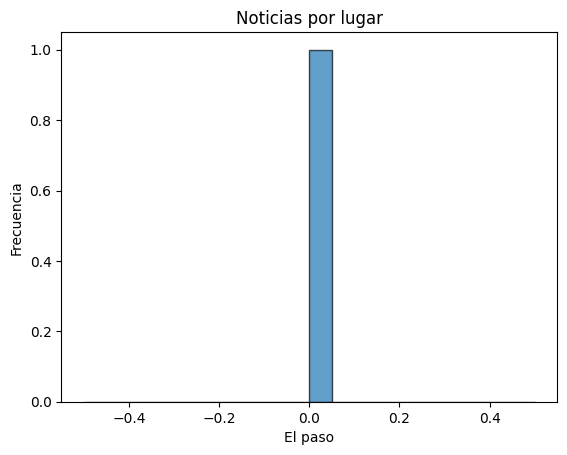

In [47]:
plt.hist(elpaso, bins=20, edgecolor='black', alpha=0.7)

plt.title('Noticias por lugar')
plt.xlabel('El paso')
plt.ylabel('Frecuencia')
plt.show()

## 3. Conclusiones

El analisis exploratorio nos ayudo a conocer el contenido que aparca la pagina web del Diario de Juarez, en este caso las notas que nos arrojo fueron Locales, de El Paso y del Estado.